In [175]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [176]:
def distance(a: np.array, b: np.array) -> np.array:
    return np.sqrt(np.sum(np.square(a-b), axis=-1))  # ???
a = distance(np.array([[0, 0], [0, 0], [2, 2]]),np.array([[1, 1], [2, 2], [5, 6]]))
print(a)

[1.41421356 2.82842712 5.        ]


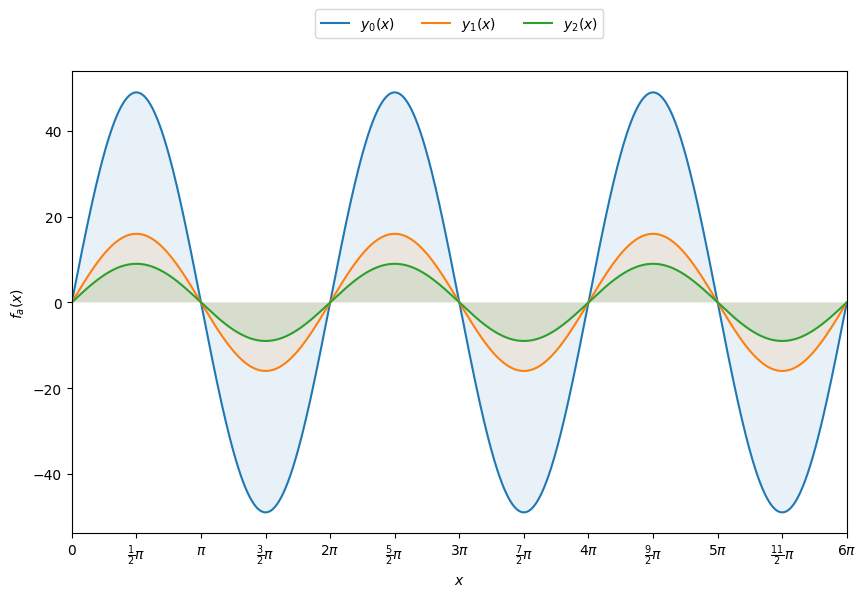

In [177]:
def generate_graph(a: List[float], show_figure: bool = False, save_path: str | None = None):
    
    def format_func(value, tick_number):
        '''
        Fromat an axis markings to the pi dimension
        '''
        N = int(np.round(2 * value / np.pi))
        if N == 0:
            return '0'
        if N == 2:
            return r'$\pi$'
        elif N % 2 == 0:
            return rf'${{{N//2}}}{{\pi}}$'
        else:
            return rf'$\frac{{{N}}}{{2}}{{\pi}}$' 
    
    def func(a, x):
        '''
        Mathematical implementation of target function
        '''
        a_np = np.array(a).reshape(-1, 1)  # rechape for broadcast
        y = (a_np*a_np)*np.sin(x)
        return y
    # math part
    x = np.linspace(0, 6*np.pi, 1000)
    y = func(a, x) 
    
    # prepare display
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    ax.plot()
    ax.set_xlim(0,6*np.pi)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f_{a}(x)$')
    # plotting
    for i, _ in enumerate(a):
        ax.plot(x, y[i], label=rf'$y_{{{i}}}(x)$')
        ax.fill_between(x, y[i], alpha=0.1)
    # set legend position
    ax.legend(loc='upper center', ncol=len(a), bbox_to_anchor=(0.5, 1.15))
    
    # postprocessing
    if save_path:
        plt.savefig(save_path)
    if show_figure:
        plt.show()

generate_graph([7, 4, 3], True, 'image1.png')